<a href="https://colab.research.google.com/github/aims777/facial-emotion-1/blob/main/final_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EMOTION RECOGNITION


## Getting data and pre-processing it:
### 1. downloading the dataset FER 2013 from a google drive file.
### 2. Joining train data with test to increase dataset
### 3. Changing types of emotion names to numbers 0,1,2,3...6
### 4. data augmnentation to increasing data for solving overfitting
### 5. Resizing images to 224 px so that we can fit into the model

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the image size and batch size
img_size = 224
batch_size = 8

# operating system is used interacting with the computer local system
import os
#matplotlib is a library used for plotting graphs and analysing data
import matplotlib.pyplot as plt
# numpy is used for working through large data and everything with complex maths like matrices and formulas
import numpy as np
import pandas as pd

# used for unzipping file
import zipfile
# used for downloading files from google drive
import gdown #google download
# Create a dataset directory/folder
dataset_dir = 'dataset'
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

#Define the Google Drive file ID and the output path
file_id = '1WwPLHxZnCxIpikJ9Kr5dWYJSqjA9Jp0C'
output_path = os.path.join(dataset_dir, 'archive (1).zip')

# Download the file using gdown
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_path, quiet=False)

# Unzip the file
with zipfile.ZipFile(output_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_dir)

print(f'Files have been extracted to {dataset_dir}')


Downloading...
From (original): https://drive.google.com/uc?id=1WwPLHxZnCxIpikJ9Kr5dWYJSqjA9Jp0C
From (redirected): https://drive.google.com/uc?id=1WwPLHxZnCxIpikJ9Kr5dWYJSqjA9Jp0C&confirm=t&uuid=fd6d2129-4761-4356-a83e-357beb469ec4
To: /content/dataset/archive (1).zip
100%|██████████| 63.3M/63.3M [00:01<00:00, 37.0MB/s]


Files have been extracted to dataset


In [ ]:
#Inceaseing the dataset size to avoid
import os
import shutil

# Define the source and destination directories
train_dir = '/content/dataset/train'
test_dir = '/content/dataset/test'

# Function to merge datasets
def merge_datasets(train_dir, test_dir):
    for class_dir in os.listdir(test_dir):
        test_class_dir = os.path.join(test_dir, class_dir)
        train_class_dir = os.path.join(train_dir, class_dir)
        if os.path.isdir(test_class_dir):
            if not os.path.exists(train_class_dir):
                os.makedirs(train_class_dir)
            for img_file in os.listdir(test_class_dir):
                src_file = os.path.join(test_class_dir, img_file)
                dst_file = os.path.join(train_class_dir, img_file)
                shutil.move(src_file, dst_file)

In [ ]:
# Merge the datasets
merge_datasets(train_dir, test_dir)


shutil.rmtree('/content/dataset/test')

In [ ]:
# Specify the path to the dataset directory in your Google Drive
dataset_dir = '/content/dataset/train'


# Define the mapping from folder names to numbers
folder_mapping = {
    'angry': '0',
    'disgust': '1',
    'fear': '2',
    'happy': '3',
    'neutral': '4',
    'sad': '5',
    'surprise': '6'
}

# List all folders in the dataset directory
folders = [f for f in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, f))]
print("Original folder names:", folders)

# Rename the folders according to the mapping
for folder in folders:
    if folder in folder_mapping:
        old_folder_path = os.path.join(dataset_dir, folder)
        new_folder_path = os.path.join(dataset_dir, folder_mapping[folder])
        os.rename(old_folder_path, new_folder_path)


Original folder names: ['surprise', 'sad', 'happy', 'neutral', 'angry', 'fear', 'disgust']


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the image size and batch size
img_size = 224
batch_size = 8

# Define the dataset directory
dataset_dir = 'dataset/train'

# Define the data generator with data augmentation
datagen = ImageDataGenerator(
    rui
    horzontal_flip=True,
    rotation_range=20,  # Added more augmentation
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    validation_split=0.2
)

# Create the training and validation generators
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'
)

Found 28713 images belonging to 7 classes.
Found 7174 images belonging to 7 classes.


## Model defining and model training:
### 1. Choosing imagenet pretrained model for emotion recognisation
### 2. Adding extra layers in the end to make the model predict 7 different categories
### 3. Model graphical representation for loss and accuracy

In [ ]:
# Load the pre-trained MobileNetV2 model
base_model = tf.keras.applications.MobileNetV2(input_shape=(img_size, img_size, 3), include_top=False, weights='imagenet')


# Add custom layers on top of the base model
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(x)  # Added L2 regularization
x = layers.Dropout(0.5)(x)  # Added dropout
x = layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(x)  # Added L2 regularization
x = layers.Dropout(0.5)(x)  # Added drop-out
predictions = layers.Dense(7, activation='softmax')(x)

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
# Create the model
new_model = keras.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
new_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model using the generators
history = new_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size,
    epochs=25,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/25
3589/3589 [==============================] - 466s 122ms/step - loss: 1.9563 - accuracy: 0.3385 - val_loss: 1.5949 - val_accuracy: 0.4862
Epoch 2/25
3589/3589 [==============================] - 436s 121ms/step - loss: 1.6073 - accuracy: 0.4716 - val_loss: 1.4775 - val_accuracy: 0.5209
Epoch 3/25
3589/3589 [==============================] - 433s 121ms/step - loss: 1.4269 - accuracy: 0.5284 - val_loss: 1.3095 - val_accuracy: 0.5511
Epoch 4/25
3589/3589 [==============================] - 435s 121ms/step - loss: 1.3203 - accuracy: 0.5593 - val_loss: 1.2159 - val_accuracy: 0.5818
Epoch 5/25
3589/3589 [==============================] - 436s 122ms/step - loss: 1.2537 - accuracy: 0.5747 - val_loss: 1.1706 - val_accuracy: 0.5932
Epoch 6/25
3589/3589 [==============================] - 435s 121ms/step - loss: 1.1902 - accuracy: 0.5984 - val_loss: 1.1180 - val_accuracy: 0.6087
Epoch 7/25
3589/3589 [==============================] - 433s 121ms/step - loss: 1.1514 - accuracy: 0.6099 - val_

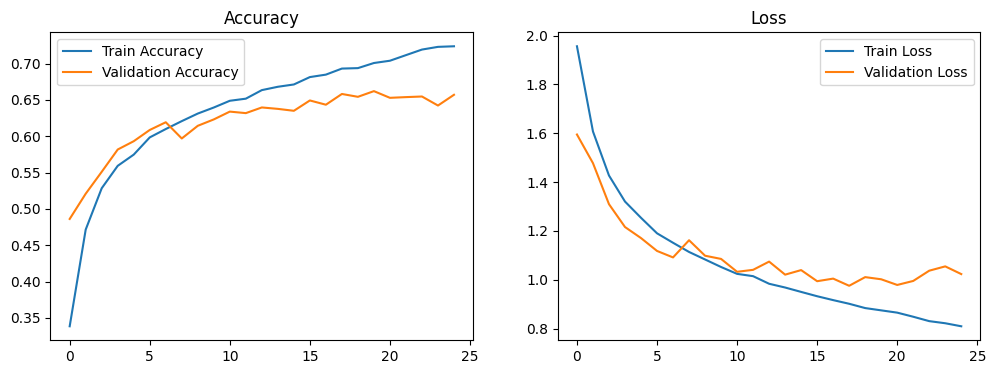

In [ ]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [ ]:
new_model.save('final.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Running Test of model:


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
!gdown 1szWa1t1b446c5U2uTdpgzXgMizSEIxoF

Downloading...
From: https://drive.google.com/uc?id=1szWa1t1b446c5U2uTdpgzXgMizSEIxoF
To: /content/final.h5
100% 29.8M/29.8M [00:00<00:00, 53.9MB/s]


In [ ]:
new_model = tf.keras.models.load_model('final.h5')

In [ ]:
# Define the emotion labels
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def predict_emotion(image_path):
    # Read the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Load the face cascade
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces in the image
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    face_roi = None
    for x, y, w, h in faces:
        roi_gray = gray[y: y+h, x: x+w]
        roi_color = img[y:y+h, x:x+w]
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex: ex+ew]

    if face_roi is None:
        print("No face detected in the image.")
        return None

    # Display the image with the detected face
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))
    plt.show()

    # Preprocess the face region of interest
    final_image = cv2.resize(face_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis=0)  # Needs 4th dimension
    final_image = final_image / 255.0  # Normalization

    # Make predictions
    predictions = new_model.predict(final_image)

    # Get the emotion with the highest probability
    max_index = np.argmax(predictions[0])
    emotion = emotion_labels[max_index]

    return emotion, predictions[0]


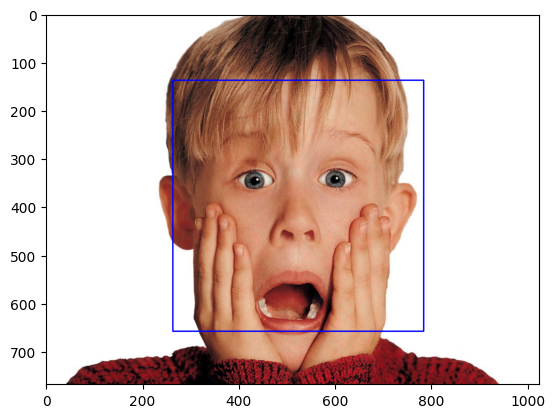

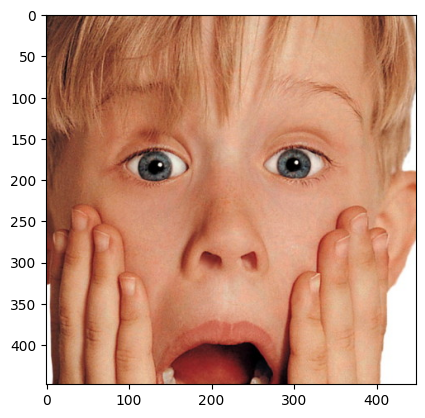

1/1 [==============================] - 0s 25ms/step
Predicted Emotion: fear
Prediction Probabilities: [5.0357571e-03 5.9825929e-06 8.6560506e-01 2.6683163e-04 8.5321284e-05
 1.7674371e-03 1.2723355e-01]


In [ ]:
# Example usage
image_path = 'surprised.jpg'
emotion, prediction_probs = predict_emotion(image_path)
if emotion is not None:
    print(f'Predicted Emotion: {emotion}')
    print(f'Prediction Probabilities: {prediction_probs}')


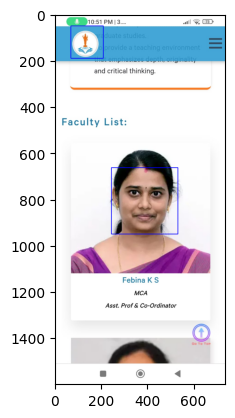

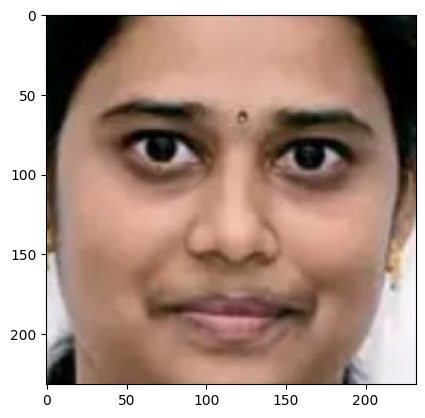

1/1 [==============================] - 3s 3s/step
Predicted Emotion: happy
Prediction Probabilities: [5.8948169e-03 2.7426284e-05 5.6400425e-03 5.5148429e-01 4.0772080e-01
 1.5132489e-02 1.4100134e-02]


In [ ]:
# Example usage
image_path = '/content/Photo from Aiman (1).jpg'
emotion, prediction_probs = predict_emotion(image_path)
if emotion is not None:
    print(f'Predicted Emotion: {emotion}')
    print(f'Prediction Probabilities: {prediction_probs}')

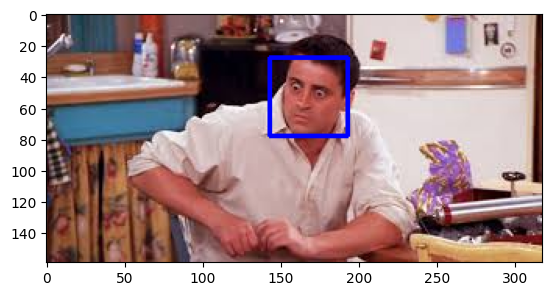

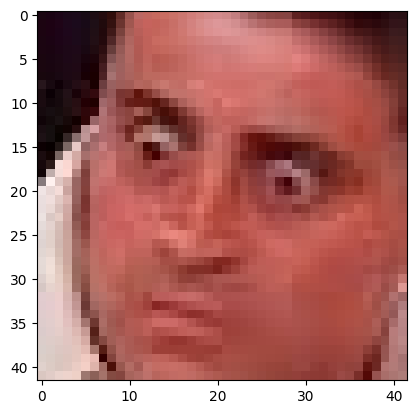

1/1 [==============================] - 3s 3s/step
Predicted Emotion: angry
Prediction Probabilities: [8.7862360e-01 3.7053998e-03 4.9510155e-02 7.5695291e-03 1.5637561e-04
 1.2478955e-03 5.9187043e-02]


In [ ]:
# Example usage
image_path = '/content/images.jfif'
emotion, prediction_probs = predict_emotion(image_path)
if emotion is not None:
    print(f'Predicted Emotion: {emotion}')
    print(f'Prediction Probabilities: {prediction_probs}')